# EDA for parallel corpus, mono corpus and dict

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

## Рассмотрим сначала parallel corpus
### Проанализируем данные на деффект Г Е Р М А Н И Я и найдем дупликаты

In [4]:
parallel_data = pd.read_csv('/kaggle/input/mansi-russian-parralel-corpus/overall_80K.csv', index_col=0)
pattern = r'\S\s\S\s\S\s\S\s\S\s'
result = parallel_data['target'][parallel_data.target.str.contains(pattern)]
parallel_data.drop(result.index, axis=0, inplace=True)

In [5]:
pd.DataFrame(result).to_csv('data.csv')

In [6]:
duplicates = parallel_data[parallel_data.duplicated()]
parallel_data.drop(duplicates.index, axis=0, inplace=True)

In [7]:
print(f"""
Кол-во кейсов с дефектом написания слов через пробел: {result.shape[0]}
Кол-во полных дупликатов: {duplicates.shape[0]}
""")


Кол-во кейсов с дефектом написания слов через пробел: 847
Кол-во полных дупликатов: 253



In [8]:
parallel_data.reset_index(drop=True, inplace=True)

### Посмотрим на кол-во NaN values и информацию о корпусе 

In [9]:
print("Dataset Info:")
parallel_data.info()

print("\nMissing values:")
print(parallel_data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78701 entries, 0 to 78700
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  78701 non-null  object
 1   source  78701 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB

Missing values:
target    0
source    0
dtype: int64


### Посмотрим на корреляцию длин предложений источника и цели

In [10]:
parallel_data['source_length'] = parallel_data['source'].apply(lambda x: len(x.split()))
parallel_data['target_length'] = parallel_data['target'].apply(lambda x: len(x.split()))

print("\nSummary of Source Text Lengths:")
print(parallel_data['source_length'].describe())
print("\nSummary of Target Text Lengths:")
print(parallel_data['target_length'].describe())


Summary of Source Text Lengths:
count    78701.000000
mean         8.417568
std          4.885508
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max        188.000000
Name: source_length, dtype: float64

Summary of Target Text Lengths:
count    78701.000000
mean         8.015133
std          4.868407
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        150.000000
Name: target_length, dtype: float64


Некоторые длины вяглядят аномальными, посмотрим на те, которые больше 50

In [11]:
parallel_data[parallel_data['source_length'] > 50]

,target,source,source_length,target_length
30562,17. Анастасия Кимкъясуй па̄вылт самын патыс. 1...,17. Анастасия родилась в дерне Кимъкясуй. 18. ...,66,66
30568,4. Татьяна Саранпа̄выл школа а̄стламе юи-па̄лт...,4. Татьяна после окончания Саранпаульской школ...,70,68
30576,25. А̄ще о̄лмēт йӣвныл са̄всыр хурит ёргыс. 26...,25. Отец был мастером резьбы по дереву. 26. Из...,74,68
30954,5. Э̄кваг-о̄йкаг акван-минамēн па̄сныл ань нал...,"5. С того момента, как они поженились, прошло ...",86,71
30962,27. Па̄вланылт на̄й постын станция о̄ньщēгыт. ...,27. В лесном поселении имеется переносная стан...,58,55
30973,34. Ирина Константиновна Поята Ха̄льӯс район Л...,34. Ирина Константиновна Поята родилась и выро...,188,150
30982,51. Ты ха̄йтнутыт та̄л сыс акв щёс хотты ма̄ны...,51. Волки один раз в год делают набеги из друг...,68,59
30988,57. Тув миннэ̄в порат тӯр ва̄тат нолвитын щалт...,57. Когда ехали на буранах к месту выпаса олен...,86,72
30992,44. Савва са̄лыянэ «Э̄ти пурн тӯрт» о̄ньщиянэ....,44. Савва место для выпаса оленей выбрал у под...,61,50
30997,13. Ань нэ̄г-хумы̄г хо̄т ня̄врам о̄ньщēг. 14. ...,13. Супруги вырастили шестерых детей. 14. Стар...,57,58


In [12]:
parallel_data[parallel_data['source_length']==188].target.tolist()[0]

'34. Ирина Константиновна Поята Ха̄льӯс район Ло̄пмус па̄вылт самын патыс. 35. А̄ще Константин Корнилович, оматэ Ольга Максимовна Албиныг о̄лсы̄г. 36. Э̄кваг-о̄йкаг колта̄глэ̄нт китхуйплов ня̄врам янмалтасы̄г. 37. Ань са̄т хо̄тпа хультыс.38. Ирина школа а̄стламе юи-па̄лт Салехард ӯс медучилищан ханищтахтуӈкве минас. 39. А̄стламе юи-па̄лт Ямал ма̄н Тарко-Сале ӯс пӯльницан рӯпитаӈкве кēтвес. 40. Тот мощ рӯпитас ос хум ва̄рыс. 41. О̄йкатэ̄н Молдавия ма̄н о̄луӈкве тотвес. 42. Тувыл 1990 та̄лт тэ̄н ювле Ха̄льӯсн щēмьяӈ та̄гыл ва̄нтлысы̄г. 43. Нэ̄ пӯльницат терапевт-лēккарн нё̄тым нёловхуйплов та̄л рӯпитас. 44. Та юи-па̄лт ос физиотерапия ва̄рмаль щирыл э̄лаль ханищтахтас. 45. Ань ты пӯсмалтан ва̄рмаль щирыл Ха̄льӯс пӯльницат китхуйплов та̄л рӯпиты.46. Ирина Константиновна о̄йкатэ̄нтыл кит ня̄врам янмалтасы̄г. 47. Пыгēн юридический академия а̄стлас. 48. Ань Ха̄льӯст о̄лы. 49. А̄гитэ̄н ос Ханты-Мансийск ӯс педколледжит нилыт та̄л ханищтахты.  50. Ма̄н ма̄ньщи щēмьят йильпи та̄л кастыл янытлыя

Мы видим кейсы с "перечислением". Подчистим данные и уберем эти числа для обоих языков.

In [13]:
enumeration = parallel_data[parallel_data.target.str.contains(r'^\d+\.', regex=True)]
enumeration.shape

(463, 4)

In [14]:
pattern = r'\d+\.\s*'
parallel_data.loc[:, 'target'] = parallel_data['target'].str.replace(pattern, '', regex=True)
parallel_data.loc[:, 'source'] = parallel_data['source'].str.replace(pattern, '', regex=True)

In [15]:
parallel_data['source_length'] = parallel_data['source'].apply(lambda x: len(x.split()))
parallel_data['target_length'] = parallel_data['target'].apply(lambda x: len(x.split()))

print("\nSummary of Source Text Lengths:")
print(parallel_data['source_length'].describe())
print("\nSummary of Target Text Lengths:")
print(parallel_data['target_length'].describe())


Summary of Source Text Lengths:
count    78701.000000
mean         8.414976
std          4.863528
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max        168.000000
Name: source_length, dtype: float64

Summary of Target Text Lengths:
count    78701.000000
mean         8.012948
std          4.849870
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        130.000000
Name: target_length, dtype: float64


In [16]:
parallel_data[parallel_data['source_length']==168].target.tolist()[0]

'Ирина Константиновна Поята Ха̄льӯс район Ло̄пмус па̄вылт самын патыс. А̄ще Константин Корнилович, оматэ Ольга Максимовна Албиныг о̄лсы̄г. Э̄кваг-о̄йкаг колта̄глэ̄нт китхуйплов ня̄врам янмалтасы̄г. Ань са̄т хо̄тпа хультыс.Ирина школа а̄стламе юи-па̄лт Салехард ӯс медучилищан ханищтахтуӈкве минас. А̄стламе юи-па̄лт Ямал ма̄н Тарко-Сале ӯс пӯльницан рӯпитаӈкве кēтвес. Тот мощ рӯпитас ос хум ва̄рыс. О̄йкатэ̄н Молдавия ма̄н о̄луӈкве тотвес. Тувыл 1990 та̄лт тэ̄н ювле Ха̄льӯсн щēмьяӈ та̄гыл ва̄нтлысы̄г. Нэ̄ пӯльницат терапевт-лēккарн нё̄тым нёловхуйплов та̄л рӯпитас. Та юи-па̄лт ос физиотерапия ва̄рмаль щирыл э̄лаль ханищтахтас. Ань ты пӯсмалтан ва̄рмаль щирыл Ха̄льӯс пӯльницат китхуйплов та̄л рӯпиты.Ирина Константиновна о̄йкатэ̄нтыл кит ня̄врам янмалтасы̄г. Пыгēн юридический академия а̄стлас. Ань Ха̄льӯст о̄лы. А̄гитэ̄н ос Ханты-Мансийск ӯс педколледжит нилыт та̄л ханищтахты.  Ма̄н ма̄ньщи щēмьят йильпи та̄л кастыл янытлыянув!О̄лупсанын кӯпнитыг вос о̄лы. Йильпи та̄лт на̄н щуниӈыг вос ēмтэ

Успешно, но теперь разобьем текст на предложения, если его длина больше 128.

In [17]:
parallel_data[parallel_data['source_length'] > 128]

,target,source,source_length,target_length
30973,Ирина Константиновна Поята Ха̄льӯс район Ло̄пм...,Ирина Константиновна Поята родилась и выросла ...,168,130


In [18]:
def split_by_sentences(text, max_words=128):
    sentences = re.split(r'(?<=[.!?])\s+', text) 
    current_part = []
    current_word_count = 0
    parts = []
    
    for sentence in sentences:
        sentence_word_count = len(sentence.split())
        
        if current_word_count + sentence_word_count <= max_words:
            current_part.append(sentence)
            current_word_count += sentence_word_count
        else:
            
            parts.append(' '.join(current_part))
            current_part = [sentence]
            current_word_count = sentence_word_count
    
    if current_part:
        parts.append(' '.join(current_part))
    
    return parts

print(split_by_sentences(parallel_data[parallel_data['target_length'] > 128].target.tolist()[0]))
print(split_by_sentences(parallel_data[parallel_data['source_length'] > 128].source.tolist()[0]))

['Ирина Константиновна Поята Ха̄льӯс район Ло̄пмус па̄вылт самын патыс. А̄ще Константин Корнилович, оматэ Ольга Максимовна Албиныг о̄лсы̄г. Э̄кваг-о̄йкаг колта̄глэ̄нт китхуйплов ня̄врам янмалтасы̄г. Ань са̄т хо̄тпа хультыс.Ирина школа а̄стламе юи-па̄лт Салехард ӯс медучилищан ханищтахтуӈкве минас. А̄стламе юи-па̄лт Ямал ма̄н Тарко-Сале ӯс пӯльницан рӯпитаӈкве кēтвес. Тот мощ рӯпитас ос хум ва̄рыс. О̄йкатэ̄н Молдавия ма̄н о̄луӈкве тотвес. Тувыл 1990 та̄лт тэ̄н ювле Ха̄льӯсн щēмьяӈ та̄гыл ва̄нтлысы̄г. Нэ̄ пӯльницат терапевт-лēккарн нё̄тым нёловхуйплов та̄л рӯпитас. Та юи-па̄лт ос физиотерапия ва̄рмаль щирыл э̄лаль ханищтахтас. Ань ты пӯсмалтан ва̄рмаль щирыл Ха̄льӯс пӯльницат китхуйплов та̄л рӯпиты.Ирина Константиновна о̄йкатэ̄нтыл кит ня̄врам янмалтасы̄г. Пыгēн юридический академия а̄стлас. Ань Ха̄льӯст о̄лы. А̄гитэ̄н ос Ханты-Мансийск ӯс педколледжит нилыт та̄л ханищтахты. Ма̄н ма̄ньщи щēмьят йильпи та̄л кастыл янытлыянув!О̄лупсанын кӯпнитыг вос о̄лы.', 'Йильпи та̄лт на̄н щуниӈыг вос ē

Так как таких кейсов немного, это позволяет нам посмотреть глазами разбение, Видно, что текст на русском более объемный, сделаем сплит предложений по нему.

In [19]:
parallel_data.loc[len(parallel_data), ['target', 'source']] = [
    'Ирина Константиновна Поята Ха̄льӯс район Ло̄пмус па̄вылт самын патыс. А̄ще Константин Корнилович, оматэ Ольга Максимовна Албиныг о̄лсы̄г. Э̄кваг-о̄йкаг колта̄глэ̄нт китхуйплов ня̄врам янмалтасы̄г. Ань са̄т хо̄тпа хультыс.Ирина школа а̄стламе юи-па̄лт Салехард ӯс медучилищан ханищтахтуӈкве минас. А̄стламе юи-па̄лт Ямал ма̄н Тарко-Сале ӯс пӯльницан рӯпитаӈкве кēтвес. Тот мощ рӯпитас ос хум ва̄рыс. О̄йкатэ̄н Молдавия ма̄н о̄луӈкве тотвес. Тувыл 1990 та̄лт тэ̄н ювле Ха̄льӯсн щēмьяӈ та̄гыл ва̄нтлысы̄г. Нэ̄ пӯльницат терапевт-лēккарн нё̄тым нёловхуйплов та̄л рӯпитас. Та юи-па̄лт ос физиотерапия ва̄рмаль щирыл э̄лаль ханищтахтас. Ань ты пӯсмалтан ва̄рмаль щирыл Ха̄льӯс пӯльницат китхуйплов та̄л рӯпиты.Ирина Константиновна о̄йкатэ̄нтыл кит ня̄врам янмалтасы̄г. Пыгēн юридический академия а̄стлас.',
    'Ирина Константиновна Поята родилась и выросла в Берёзовском районе деревне Ломбовож. Её отец Константин Корнилович и мать Ольга Максимовна Албины. Родители вырастили двенадцать детей. Сейчас осталось семь человек. Ирина после окончания школы поехала в г. Салехард и поступила в медучилище. Окончив медучилище она осталась в Ямало-Ненецком автономном округе, её направили на работу в городскую больницу г. Тарко-Сале. Немного поработав она вышла замуж. Затем муж увёз её жить к себе на родину в Молдавию. Позже в 1990 году семья вернулась обратно. Там она устроилась в районную больницу помощником терапевта и проработала почти восемнадцать лет. Потом прошла курсы повышения квалификации по специальности физиотерапия. И сейчас она в Берёзовской больнице по этому направлению работает уже более двенадцати лет. Ирина Константиновна с супругом вырастили двоих детей. Сын окончил юридический факультет.'
]

parallel_data.loc[len(parallel_data), ['target', 'source']] = [
    'Ань Ха̄льӯст о̄лы. А̄гитэ̄н ос Ханты-Мансийск ӯс педколледжит нилыт та̄л ханищтахты. Ма̄н ма̄ньщи щēмьят йильпи та̄л кастыл янытлыянув!О̄лупсанын кӯпнитыг вос о̄лы. Йильпи та̄лт на̄н щуниӈыг вос ēмтэ̄гын.Рӯтанын, юртанын ёт са̄в та̄л пуста̄гыл о̄лэ̄н.',
    'Сейчас проживает в Берёзово. Дочь четвёртый год обучается в педколледже г. Ханты-Мансийска. Мы поздравляем эти мансийские семьи с Новым Годом! Пусть ваша жизнь всегда будет лёгкой. Чтобы Новый год принёс вам счастье. Мы желаем вам и вашим близким здоровья на многие года.'
]

In [20]:
parallel_data.drop(parallel_data[parallel_data['source_length'] > 128].index, axis=0, inplace=True)

In [21]:
parallel_data['source_length'] = parallel_data['source'].apply(lambda x: len(x.split()))
parallel_data['target_length'] = parallel_data['target'].apply(lambda x: len(x.split()))

print("\nSummary of Source Text Lengths:")
print(parallel_data['source_length'].describe())
print("\nSummary of Target Text Lengths:")
print(parallel_data['target_length'].describe())


Summary of Source Text Lengths:
count    78702.000000
mean         8.414869
std          4.849744
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max        126.000000
Name: source_length, dtype: float64

Summary of Target Text Lengths:
count    78702.000000
mean         8.012846
std          4.841530
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        105.000000
Name: target_length, dtype: float64


In [22]:
parallel_data.reset_index(drop=True, inplace=True)

### Теперь, когда данные подготовлены, визуализируем их

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


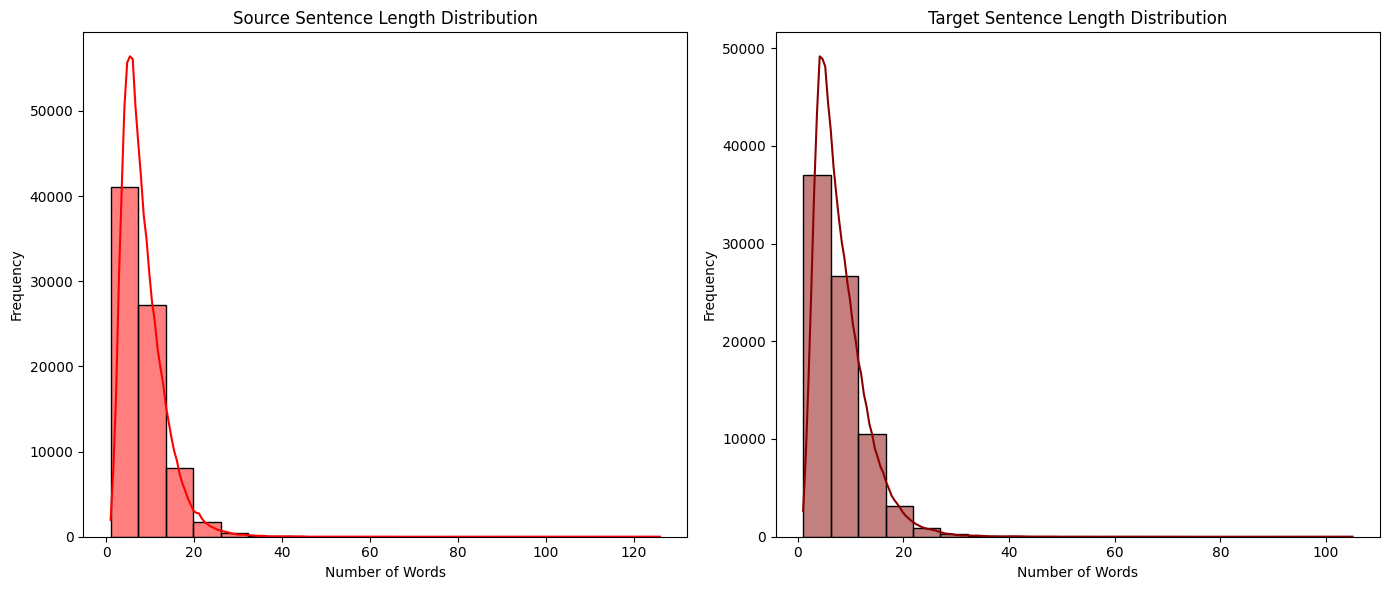

In [23]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.histplot(parallel_data['source_length'], kde=True, bins=20, color='red')
plt.title('Source Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(parallel_data['target_length'], kde=True, bins=20, color='darkred')
plt.title('Target Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('lenght_distribution.png')
plt.show()

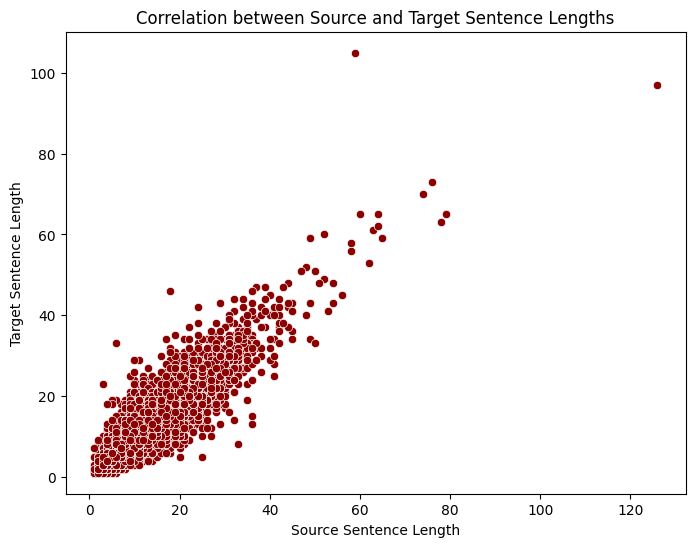

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='source_length', y='target_length', data=parallel_data, color='darkred')
plt.title('Correlation between Source and Target Sentence Lengths')
plt.xlabel('Source Sentence Length')
plt.ylabel('Target Sentence Length')
plt.savefig('corr_1.png')
plt.show()

Странно, есть очень большая разница для некоторых предложений. Проверим.

In [25]:
differ = np.abs(parallel_data['source_length']-parallel_data['target_length'])
parallel_data[differ > 25][['target', 'source']]

,target,source
21722,"Ӯлпыл , хо̄лтан а̄лпылнува, ӯнтимен ха̄пын - а...",Отпустил коня Иванушка - дурачок и взял с него...
24843,"Тувле кос ёмантас, луве ла̄ви: ""Ул минэн, тыг ...","Конь говорит: ""Не уходи, иди сюда!"""
40687,"купса Сибиряков (Щипрах) лёнх оньщас - ""Щипрах...",Первым поселением была манси деревня. потом из...
78700,Ирина Константиновна Поята Ха̄льӯс район Ло̄пм...,Ирина Константиновна Поята родилась и выросла ...


In [26]:
differ.describe()

count    78702.000000
mean         1.322914
std          1.447477
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         46.000000
dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


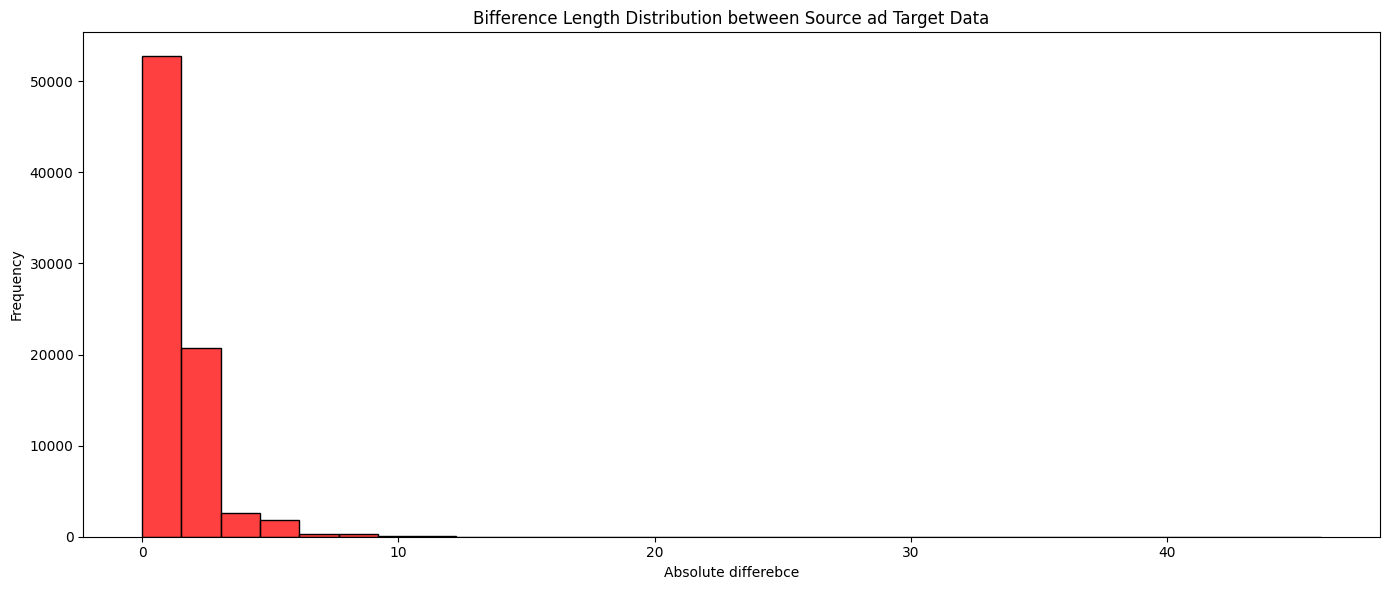

In [27]:
plt.figure(figsize=(14,6))

sns.histplot(differ, bins=30, color='red')
plt.title('Вifference Length Distribution between Source ad Target Data')
plt.xlabel('Absolute differebce')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('lenght_distribution.png')
plt.show()

In [28]:
for irow, row in parallel_data[differ > 15].iterrows():
    print(irow)
    print(row.target)
    print(row.source)
    print()

1644
Касай суприще осыглатас, я-ты, ха̄р-о̄йка нуйгалаӈкве патыстэ, совенюре нуйгалас, котанэ-лӯтанэ що̄питас, нёвлянэ-лӯтанэ яктлас
Наточил он свой ножичек - и вот начинает он снимать шкуру с оленя-быка, снял с него всю шкуру, шкуру с ног и прочее подготовил, мясо и прочее кусками нарезал

7156
Ты āги исэ хуньт ōс тув вуйвес, Виткуль сāлыӈ сун ё̄рмалтаӈкв, манур ōлы тай, ат та ва̄йхаты, хунь хоты хōтпа Виткуль порслы, сāлыянэ пēлпыг патапēгыт, мат­кем ōс та сӯлтты.
И душу той девушки туда забрали, нарты Виткуля её душа поддерживает

7327
Та а̄ги тай сака номтыӈ, акваг та ӯнлы, ловиньты, нэ̄пак хансы. Та а̄ги тай сака номтыӈ, акваг нэ̄пак ловиньтым та ӯнланты, акваг нэ̄пак та хансы.
Эта девушка очень умная, всё сидит, читает, книги пишет.

15540
Тыт сав общинат о̄лэ̄гыт, мӯсхалыг туп аква-китыг рӯпиты, товат тай нэ̄паканыл щирыл салыт тыт янмалтэгыт, са̄лыяныл ма̄н аты ва̄щинтасанӯв. 
У нас здесь много общин есть, одна или две общины действительно хорошо работают, а у большинства пастб

Видно, что много предложений переведены не до конца, а только первые предложения. Сделаем так: если для target>source, то тогда берем первое предложение, если target==source, то оставляем как есть.

In [29]:
for irow, row in parallel_data[differ > 15].iterrows():
    sentences_target = re.split(r'(?<=[.!?])\s+', row.target) 
    sentences_source = re.split(r'(?<=[.!?])\s+', row.source)
    
    if len(sentences_target) > len(sentences_source):
        print(parallel_data.loc[irow].target)
        parallel_data.loc[irow, 'target'] = sentences_target[0]
        print(parallel_data.loc[irow].target, parallel_data.loc[irow].source)
        
        print()

Та а̄ги тай сака номтыӈ, акваг та ӯнлы, ловиньты, нэ̄пак хансы. Та а̄ги тай сака номтыӈ, акваг нэ̄пак ловиньтым та ӯнланты, акваг нэ̄пак та хансы.
Та а̄ги тай сака номтыӈ, акваг та ӯнлы, ловиньты, нэ̄пак хансы. Эта девушка очень умная, всё сидит, читает, книги пишет.

Тыт сав общинат о̄лэ̄гыт, мӯсхалыг туп аква-китыг рӯпиты, товат тай нэ̄паканыл щирыл салыт тыт янмалтэгыт, са̄лыяныл ма̄н аты ва̄щинтасанӯв. 
Тыт сав общинат о̄лэ̄гыт, мӯсхалыг туп аква-китыг рӯпиты, товат тай нэ̄паканыл щирыл салыт тыт янмалтэгыт, са̄лыяныл ма̄н аты ва̄щинтасанӯв. У нас здесь много общин есть, одна или две общины действительно хорошо работают, а у большинства пастбища для оленей лишь по бумагам оформлены, а на самом деле оленей у них нет, мы их не видели.

Тувле кос ёмантас, луве ла̄ви: "Ул минэн, тыг йиен!  Наӈ тах хотум мори ты номылматэ̄гн, э̄ква ты  сайкалы, о̄лум пасмен тый; ам нёлссам асагумн сялтэн, тот капак о̄лы, та капакта хурум сярка аен!"
Тувле кос ёмантас, луве ла̄ви: "Ул минэн, тыг йиен! Ко

In [30]:
# Удалим кейс, который по нашему мнению никак не соответстует переводу:
parallel_data.drop([40687], axis=0, inplace=True)

In [31]:
# предложение с разницей в 29 слов - здесь правильный перевод, но просто русский текст больше
differ = np.abs(parallel_data['source_length']-parallel_data['target_length'])
differ.describe()

count    78701.000000
mean         1.322347
std          1.438698
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         29.000000
dtype: float64

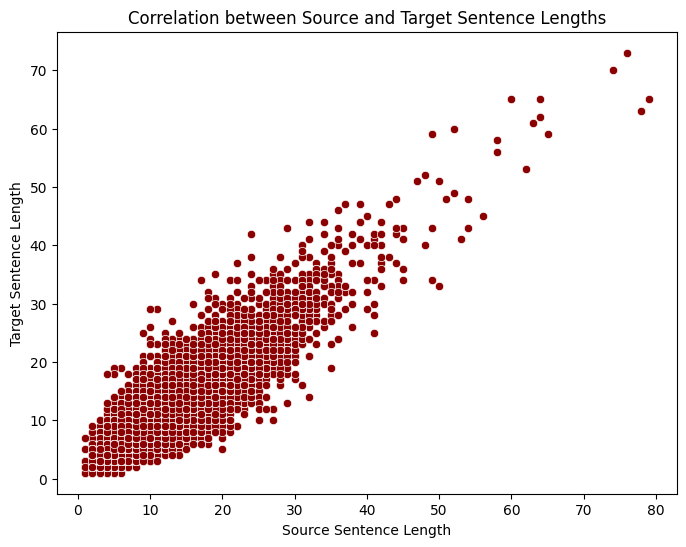

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='source_length', y='target_length', data=parallel_data[differ < 20], color='darkred')
plt.title('Correlation between Source and Target Sentence Lengths')
plt.xlabel('Source Sentence Length')
plt.ylabel('Target Sentence Length')
plt.savefig('corr_1.png')
plt.show()

In [33]:
parallel_data.reset_index(drop=True, inplace=True)

In [34]:
parallel_data.to_csv('overall_80K.csv', index=False)

### Теперь удалим стоп слова на русском и посмотрим распределение слов

In [34]:
import os

root = '/kaggle/input/stop-words-russian'
stop_words_russian = []

for file in os.listdir(root):
    with open(os.path.join(root, file), 'r') as stop_file:
        stop_words_russian += stop_file.readlines()
        
len(stop_words_russian)

2332

In [35]:
stop_words_russian = list(set(stop_words_russian))
len(stop_words_russian)

1357

In [36]:
sentences = ' '.join(parallel_data.source.tolist())
sentences = sentences.lower().split()
new_sentences = []
print(f'До удаления стоп слов: {len(sentences)}')
stop_words_russian = [sw.replace('\n', '') for sw in stop_words_russian]
    
for word in sentences:
    if word not in stop_words_russian:
        new_sentences.append(word)
    
print(f'После удаления стоп слов: {len(new_sentences)}')

До удаления стоп слов: 662208
После удаления стоп слов: 402277


In [37]:
import string

In [38]:
new_sentences = ' '.join(new_sentences)
new_sentences = new_sentences.translate(str.maketrans('', '', string.punctuation))

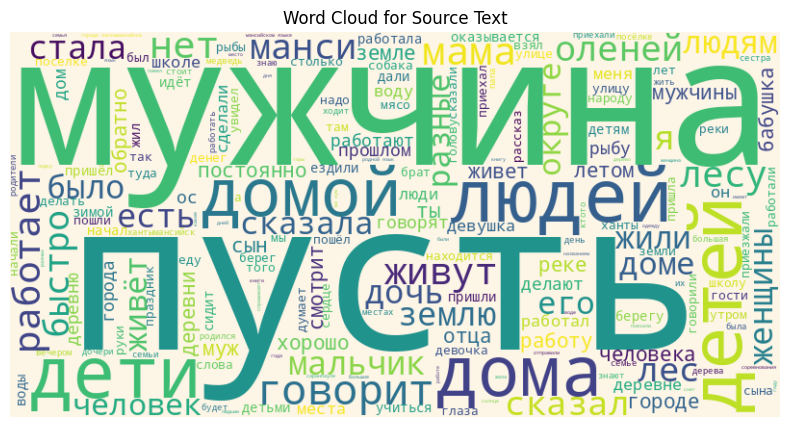

In [41]:
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='oldlace').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.savefig('words.png')
    plt.show()

plot_wordcloud(new_sentences, "Word Cloud for Source Text")

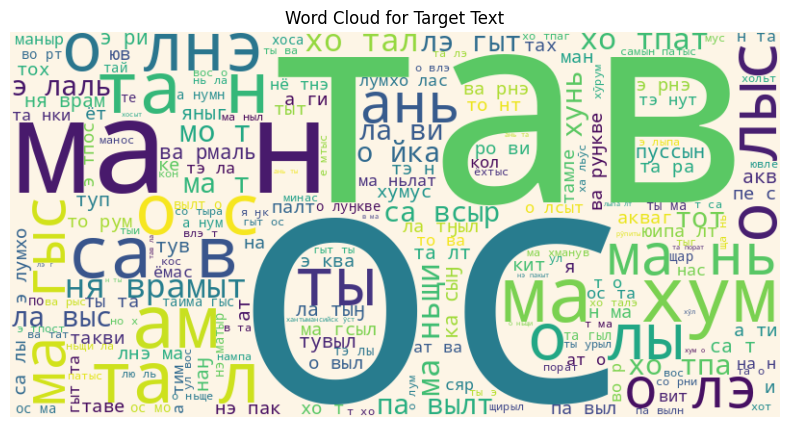

In [42]:
mansi_sentences = parallel_data.target.tolist()
mansi_sentences = ' '.join(mansi_sentences).lower()
mansi_sentences = mansi_sentences.translate(str.maketrans('', '', string.punctuation))
plot_wordcloud(mansi_sentences, "Word Cloud for Target Text")

## Monocorpus

In [30]:
mono_data = pd.read_csv('/kaggle/input/mono-dict/mansi.csv', index_col=0)
mono_data.loc[:, '0'] = mono_data['0'].str.replace('\xad', '')
mono_data.shape

(183124, 1)

In [31]:
duplicates = mono_data[mono_data.duplicated()]
mono_data.drop(duplicates.index, axis=0, inplace=True)
mono_data.shape, duplicates.shape

((180454, 1), (2670, 1))

In [32]:
mono_data['mns_length'] = mono_data['0'].apply(lambda x: len(x.split()))

print("\nSummary of Mansi Text Lengths:")
print(mono_data['mns_length'].describe())


Summary of Mansi Text Lengths:
count    180454.000000
mean         11.436133
std           6.591398
min           1.000000
25%           7.000000
50%          10.000000
75%          14.000000
max         821.000000
Name: mns_length, dtype: float64


In [33]:
mono_data[mono_data['mns_length']==821]

,0,mns_length
9864,"Генеральный Ассамблея, ань Ма̄ янытыл о̄лнэ ми...",821
168028,"Генеральный Ассамблея, ань Ма̄ янытыл о̄лнэ ми...",821


In [34]:
mono_data.loc[9864].tolist()

['Генеральный Ассамблея, ань Ма̄ янытыл о̄лнэ мирыт Акван-потыртахтам Мирколаныл (Организация Объединенных Наций) Устав нэ̄паке щирыл ос ка̄сыӈ государство тох о̄луӈкве ла̄тыӈ ла̄внэ̄ныл ма̄гыс, ка̄сащи, ань ма̄ янытыл о̄лнэ соссаӈ мирыт мо̄т мирыт ёт пуссын аквте̄м вос о̄лэ̄гыт, ос ка̄сыӈ мир мощ такви хурипатэ, тав ань ты урыл ла̄вуӈкве ве̄рми, манхурипаг о̄лы, тох вос ва̄ве, вос янытлаве, аквтох та урыл ка̄сащи, ань ка̄сыӈ мир такви матыр пӯмыщ о̄ньщи, о̄лупсатэ мирн суссылты, мо̄т мирыт ёт культураныл та маныр акван-тэ̄лыглэ̄гыт, пуссын акв мир хольт та о̄лэ̄гыт, э̄лаль та ёт о̄с ка̄сащи, ань то̄ванакт хӯлыгла̄лэ̄в, э̄рттам акв хотты мир ёмаснуве, манос акв хотты хо̄тпа такви мире щирыл, То̄рум нупыл суснэ тэ̄латэ манос культуратэ щирыл ёмаснуве, тамле номт мирн ос ма̄вн лю̄ль тоты, ма̄хум халанылт халмалтахтэ̄гыт, наука щирыл тамле номт пе̄сыг е̄мтыс, сакконт ты урыл хансым ат о̄лы, тамле ва̄рмаль ма̄гсыл ма̄хум савалэ̄гыт, тох о̄луӈкве ат ро̄ви, ка̄сащи, ань соссаӈ ма̄хум роттыг 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


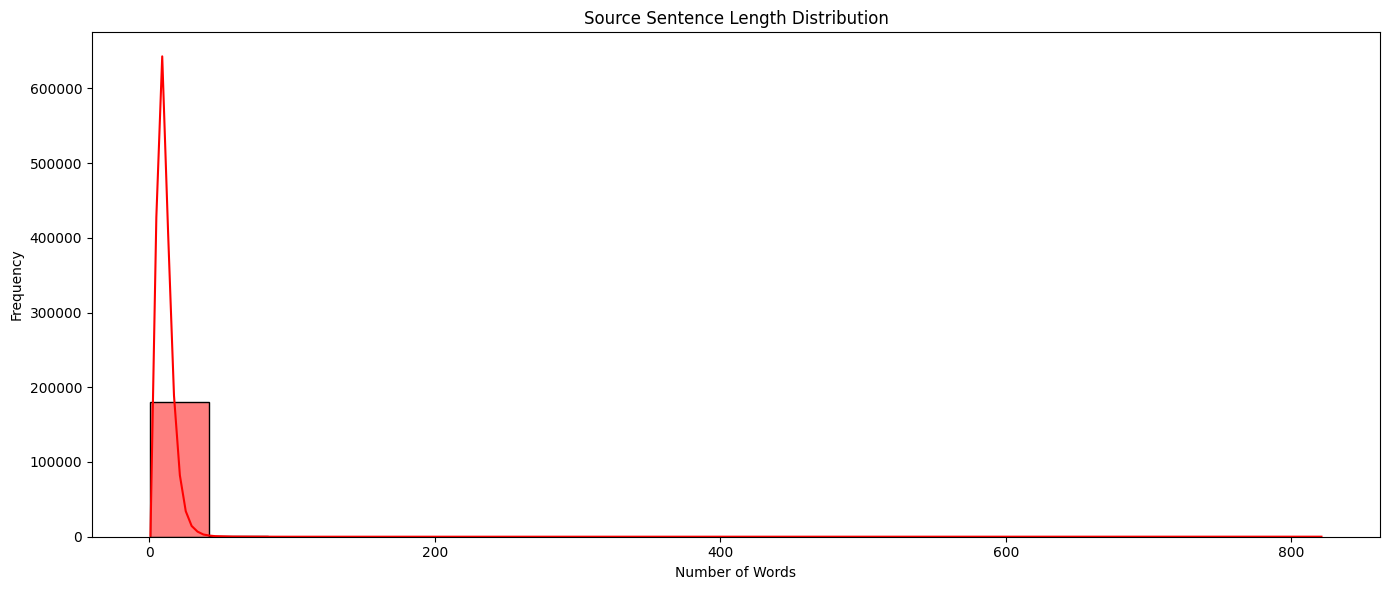

In [35]:
plt.figure(figsize=(14,6))

sns.histplot(mono_data['mns_length'], kde=True, bins=20, color='red')
plt.title('Source Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('lenght_distribution.png')
plt.show()

In [36]:
mono_data[mono_data['mns_length'] > 128]

,0,mns_length
9752,"Ва̄нэ̄в щирыл, ань э̄лумхо̄лас янытлаӈкве э̄ри...",308
9864,"Генеральный Ассамблея, ань Ма̄ янытыл о̄лнэ ми...",821
10539,"Ты ма̄хум янытлаве̄сыт: – М.Ф. Рябова, Белоярс...",129
31919,Ома – мама А̄тя – папа Ща̄нь – мать А̄щ - отец...,278
34146,То̄рум ва̄рнэ хо̄тал – погода Тӯя – весна Туи ...,293
39243,Ты тэ̄ла хосыт тах соссаӈ ма̄хманувн рӯпитаӈкв...,140
93802,Ты касылыт тамле номинацият о̄лэ̄гыт: «Хо̄тпат...,169
167925,"Ва̄нэ̄в щирыл, ань э̄лумхо̄лас янытлаӈкве э̄ри...",308
168028,"Генеральный Ассамблея, ань Ма̄ янытыл о̄лнэ ми...",821
168763,"Ты ма̄хум янытлаве̄сыт: – М. Ф. Рябова, Белояр...",139


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


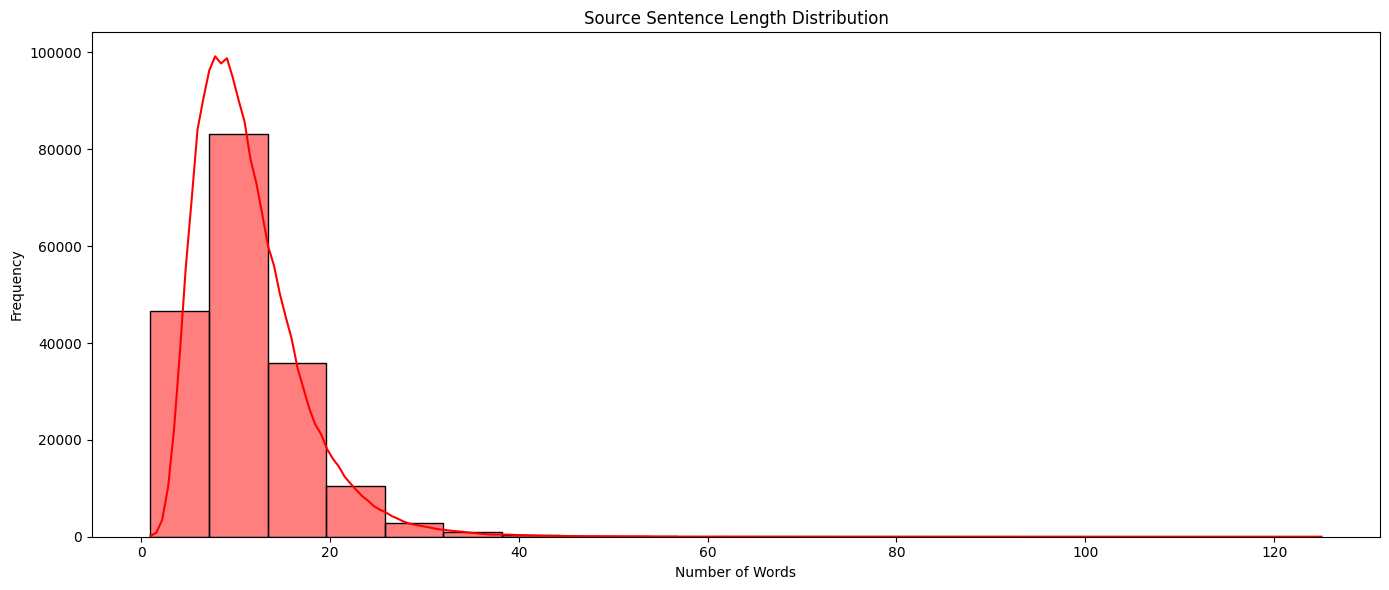

In [37]:
plt.figure(figsize=(14,6))

sns.histplot(mono_data[mono_data['mns_length'] < 128].mns_length, kde=True, bins=20, color='red')
plt.title('Source Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('lenght_distribution.png')
plt.show()

### Посчитаем кол-во слов

In [40]:
mono_data.mns_length.sum()

2063696

In [44]:
import string

mono_sentences = ' '.join(mono_data['0'].tolist())
mono_sentences = mono_sentences.lower()
mono_sentences = mono_sentences.translate(str.maketrans('', '', string.punctuation))

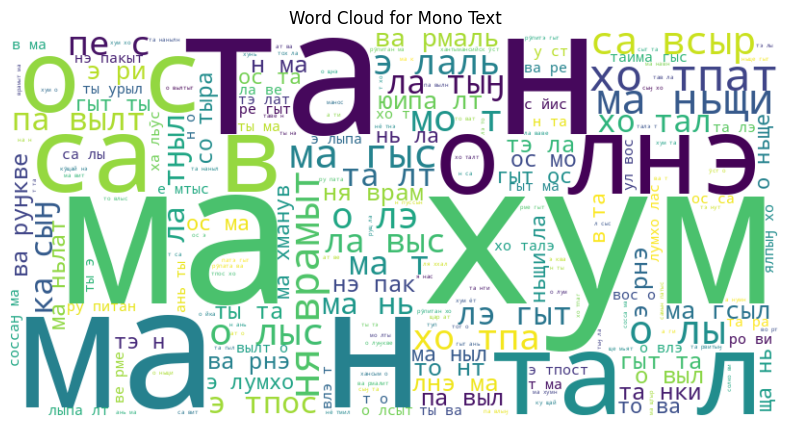

In [45]:
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.savefig('words.png')
    plt.show()

plot_wordcloud(mono_sentences, "Word Cloud for Mono Text")